# Projet SNI – Construction d’un Système de Notation Interne


**Introduction:**
Dans un contexte bancaire où la maîtrise du risque de crédit est un enjeu stratégique, les établissements financiers mettent en place des **systèmes de notation interne (SNI)** afin d’évaluer la solvabilité de leurs clients et d’anticiper les risques de défaut.

Ce projet repose sur l’exploitation de la base de données **base_sni**, qui regroupe des **informations signalétiques, socio-démographiques et comportementales** relatives à des individus d’une banque. Ces données décrivent notamment le profil des clients, leur historique de crédit et leurs comportements financiers.

**Objectif du projet:**

L’objectif principal est de **concevoir un modèle de scoring interne** permettant de :
- Analyser le comportement des clients,
- Identifier les facteurs influençant le risque de défaut,
- Estimer la probabilité de non-remboursement,
- Classer les clients selon leur niveau de risque.

Ce système de notation vise à aider la banque dans ses décisions d’octroi de crédit, d’ajustement des conditions de financement et de gestion du portefeuille client.

À travers ce notebook, nous allons procéder à :
- L’exploration et le nettoyage des données,
- La correction des anomalies et l’imputation des valeurs manquantes,
- La construction de variables explicatives pertinentes,
- La mise en place et l’évaluation de modèles de scoring.

Ce projet s’inscrit dans une démarche de **data-driven decision making** pour renforcer la performance et la sécurité des activités de crédit.


#  Nettoyage des données

Avant toute modélisation, il est indispensable d’assurer la qualité des données afin de garantir la fiabilité du système de notation interne. La phase de nettoyage permet d’identifier et de corriger les anomalies susceptibles de biaiser les résultats.

## Analyse de la structure des données

Nous commençons par examiner :
- La taille de la base,
- Les types des variables (numériques, catégorielles),
- Le nombre de valeurs manquantes par variable.


In [3]:
import pandas as pd
df = pd.read_excel("/kaggle/input/base-sni/base_SNI.xlsx", sheet_name="base_sni")
df.head(10)

,id_tiers,code_client,CRD,PNU,nb_pret,Maturite,Garantie_max,flag_lombard_decouvert,DPD 12M,Pays de domiciliation,...,Segment,date OBSERVATION,Age_relation,Date_naissance,Solde_moyen,Revenus_mensuels,Solde_arrete,Engagement,CRD/gar,CRD/eng
0,10231_2018,10231,3877.51,54792.50,1,-58,109585.0,1,0,France,...,Retail GOLD (08),2018-12-31,154,1963-01-14,NaN,NaN,-3877.510000,54792.50,0.035384,0.070767
1,10231_2019,10231,8087.98,45936.25,1,-59,0.0,1,0,France,...,Retail GOLD (08),2019-12-31,166,1963-01-14,NaN,NaN,-8115.410000,45936.25,1.000000,0.176070
2,10231_2020,10231,11702.36,45000.00,1,-60,0.0,1,0,France,...,Retail GOLD (08),2020-12-31,178,1963-01-15,NaN,NaN,-8115.410000,45000.00,1.000000,0.260052
3,10231_2021,10231,328.53,53085.75,1,-61,0.0,1,0,France,...,Retail GOLD (08),2021-12-31,190,1963-01-15,NaN,NaN,-328.530000,53085.75,1.000000,0.006189
4,10261_2018,10261,1277030.69,0.00,1,18,2475000.0,0,0,Morocco,...,"Private customer, universal (01)",2018-12-31,154,1978-01-10,NaN,NaN,78611.768604,2650000.00,0.515972,0.481898
5,10261_2018,10261,1277030.69,0.00,1,18,2475000.0,0,0,Morocco,...,"Private customer, universal (01)",2018-12-31,154,1978-01-10,NaN,NaN,78611.768604,2650000.00,0.515972,0.481898
6,10261_2019,10261,1226293.50,0.00,1,17,2650000.0,0,0,Morocco,...,"Private customer, universal (01)",2019-12-31,166,1978-01-10,NaN,NaN,14356.072616,2650000.00,0.462752,0.462752
7,10261_2019,10261,1226293.50,0.00,1,17,2650000.0,0,0,Morocco,...,"Private customer, universal (01)",2019-12-31,166,1978-01-10,NaN,NaN,14356.072616,2650000.00,0.462752,0.462752
8,10261_2020,10261,1172463.80,0.00,1,16,2650000.0,0,0,Morocco,...,"Private customer, universal (01)",2020-12-31,178,1978-01-11,NaN,NaN,14355.889016,2650000.00,0.442439,0.442439
9,10261_2020,10261,1172463.80,0.00,1,16,2650000.0,0,0,Morocco,...,"Private customer, universal (01)",2020-12-31,178,1978-01-11,NaN,NaN,14355.889016,2650000.00,0.442439,0.442439


In [14]:
df.shape
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5752 entries, 0 to 5751
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id_tiers                   5752 non-null   object        
 1   code_client                5752 non-null   int64         
 2   CRD                        5752 non-null   float64       
 3   PNU                        5752 non-null   float64       
 4   nb_pret                    5752 non-null   int64         
 5   Maturite                   5752 non-null   int64         
 6   Garantie_max               5752 non-null   float64       
 7   flag_lombard_decouvert     5752 non-null   int64         
 8   DPD 12M                    5752 non-null   int64         
 9   Pays de domiciliation      3999 non-null   object        
 10  Etat civil                 3999 non-null   object        
 11  Nationalité                3999 non-null   object        
 12  Profes

## Traitement des valeurs manquantes et cohérences 

In [16]:
df["flag_defaut"] = (df["DPD 12M"] >= 90).astype(int)


In [17]:
df.drop("DPD 12M", axis=1, inplace=True)


In [18]:
df["Date_naissance"] = pd.to_datetime(df["Date_naissance"], errors="coerce")

df["Age"] = (pd.to_datetime("today") - df["Date_naissance"]).dt.days // 365

df.drop("Date_naissance", axis=1, inplace=True)


## Encodage des variables catégorielles
Les variables catégorielles sont transformées en variables numériques via :
- One-Hot Encoding pour les variables nominales,
- Ordinal Encoding lorsque l’ordre des modalités est pertinent.

In [19]:
cat_vars = df.select_dtypes(include="object").columns
num_vars = df.select_dtypes(include=["int64", "float64"]).columns


In [21]:
df[cat_vars] = df[cat_vars].fillna("Inconnu")
df[num_vars] = df[num_vars].fillna(df[num_vars].median())


In [22]:
df.isnull().sum().sort_values(ascending=False)


id_tiers                     0
code_client                  0
CRD                          0
PNU                          0
nb_pret                      0
Maturite                     0
Garantie_max                 0
flag_lombard_decouvert       0
Pays de domiciliation        0
Etat civil                   0
Nationalité                  0
Profession                   0
Segmentation commercilale    0
Type de revenu               0
Catégorie sociale            0
Code tribunal                0
Code localité                0
Interdiction cheque          0
Segment                      0
date OBSERVATION             0
Age_relation                 0
Solde_moyen                  0
Revenus_mensuels             0
Solde_arrete                 0
Engagement                   0
CRD/gar                      0
CRD/eng                      0
flag_defaut                  0
Age                          0
dtype: int64

In [23]:
df.dtypes.value_counts()


object            12
float64           10
int64              6
datetime64[ns]     1
Name: count, dtype: int64

Les données ont été nettoyées en supprimant les variables non pertinentes, en traitant les valeurs manquantes et en transformant les variables de date en variables de durée.
La variable cible a été construite conformément à la définition réglementaire du défaut (impayés ≥ 90 jours).

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5752 entries, 0 to 5751
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id_tiers                   5752 non-null   object        
 1   code_client                5752 non-null   int64         
 2   CRD                        5752 non-null   float64       
 3   PNU                        5752 non-null   float64       
 4   nb_pret                    5752 non-null   int64         
 5   Maturite                   5752 non-null   int64         
 6   Garantie_max               5752 non-null   float64       
 7   flag_lombard_decouvert     5752 non-null   int64         
 8   Pays de domiciliation      5752 non-null   object        
 9   Etat civil                 5752 non-null   object        
 10  Nationalité                5752 non-null   object        
 11  Profession                 5752 non-null   object        
 12  Segmen

In [26]:
cat_vars = df.select_dtypes(include="object").columns
num_vars = df.select_dtypes(include=["int64", "float64"]).columns


In [28]:
df_model = pd.get_dummies(
    df,
    columns=cat_vars,
    drop_first=True
)


In [29]:
df_model.shape
df_model.head()


,code_client,CRD,PNU,nb_pret,Maturite,Garantie_max,flag_lombard_decouvert,date OBSERVATION,Age_relation,Solde_moyen,...,Code localité_TAZA (690),Code localité_TEMARA (825),Code localité_TETOUAN (720),Interdiction cheque_Interdiction bancaire (01),Segment_Institutional customer (04),Segment_Platinum (06),"Segment_Private customer, universal (01)",Segment_Retail BRONZE (07),Segment_Retail GOLD (08),Segment_Retail SILVER (09)
0,10231,3877.51,54792.50,1,-58,109585.0,1,2018-12-31,154,16476.55,...,False,False,False,False,False,False,False,False,True,False
1,10231,8087.98,45936.25,1,-59,0.0,1,2019-12-31,166,16476.55,...,False,False,False,False,False,False,False,False,True,False
2,10231,11702.36,45000.00,1,-60,0.0,1,2020-12-31,178,16476.55,...,False,False,False,False,False,False,False,False,True,False
3,10231,328.53,53085.75,1,-61,0.0,1,2021-12-31,190,16476.55,...,False,False,False,False,False,False,False,False,True,False
4,10261,1277030.69,0.00,1,18,2475000.0,0,2018-12-31,154,16476.55,...,False,False,False,False,False,False,True,False,False,False


In [30]:
df_model.dtypes.value_counts()


bool              6201
float64             10
int64                6
datetime64[ns]       1
Name: count, dtype: int64

In [36]:
df_model.dtypes.head(30)

code_client                 int64
CRD                       float64
PNU                       float64
nb_pret                     int64
Maturite                    int64
Garantie_max              float64
flag_lombard_decouvert      int64
Age_relation                int64
Solde_moyen               float64
Revenus_mensuels          float64
Solde_arrete              float64
Engagement                float64
CRD/gar                   float64
CRD/eng                   float64
flag_defaut                 int64
Age                       float64
id_tiers_10231_2019          bool
id_tiers_10231_2020          bool
id_tiers_10231_2021          bool
id_tiers_10261_2018          bool
id_tiers_10261_2019          bool
id_tiers_10261_2020          bool
id_tiers_10261_2021          bool
id_tiers_10277_2018          bool
id_tiers_10277_2019          bool
id_tiers_10277_2020          bool
id_tiers_10277_2021          bool
id_tiers_1044_2019           bool
id_tiers_1044_2020           bool
id_tiers_1044_

# Entraînement & Modélisation du Système de Scoring

In [37]:
"flag_defaut" in df_model.columns


True

## Séparation des données

La base est divisée en deux sous-ensembles :
- *Jeu d’entraînement (Training set)* : utilisé pour l’apprentissage du modèle (70%),
- *Jeu de test (Test set)* : utilisé pour évaluer la performance du modèle (30%).

Cette séparation permet de mesurer la capacité de généralisation du modèle.

In [39]:
from sklearn.model_selection import train_test_split

# Variables explicatives et cible
X = df_model.drop("flag_defaut", axis=1)
y = df_model["flag_defaut"]

# Séparation Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [40]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)


flag_defaut
0    0.979143
1    0.020857
Name: proportion, dtype: float64

In [41]:
corr = df_model.corr()["flag_defaut"].abs().sort_values(ascending=False)
corr.head(10)


flag_defaut                                                     1.000000
Profession_ADMINISTRATRICE DE STE                               0.180723
Profession_COIFFEUSE                                            0.180723
Catégorie sociale_Autres artisans et ouvriers qualifies (69)    0.157750
Interdiction cheque_Interdiction bancaire (01)                  0.153649
id_tiers_874_2018                                               0.127768
Segmentation commercilale_Mineur (MI)                           0.127768
id_tiers_874_2021                                               0.127768
id_tiers_874_2020                                               0.127768
Segment_Platinum (06)                                           0.103917
Name: flag_defaut, dtype: float64

## Choix du modèle de scoring

Nous utilisons dans ce projet la **régression logistique**, largement adoptée dans le secteur bancaire pour les systèmes de notation interne.

Le modèle estime pour chaque client une **probabilité de défaut (PD)** comprise entre 0 et 1.

In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

## Évaluation des performances

La performance du modèle est évaluée à l’aide de plusieurs indicateurs :
- **AUC – ROC** : capacité de discrimination du modèle.
- **Gini** : Le Gini mesure dans quelle mesure ces probabilités permettent de classer correctement les clients du moins risqué au plus risqué.


In [46]:
from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred_proba)
gini = 2 * auc - 1

auc, gini


(np.float64(0.5379684418145956), np.float64(0.07593688362919115))

Visualisation de la courbe AUC

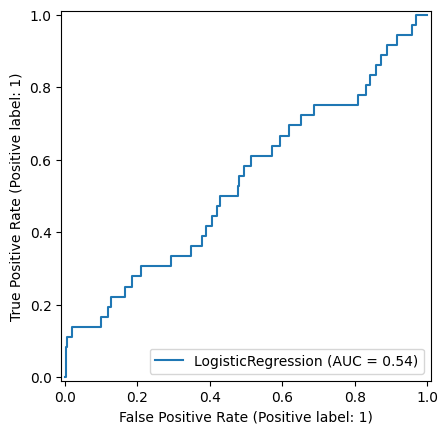

In [47]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)


In [49]:
coeffs = pd.DataFrame({
    "Variable": X_train.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coeffs.head(20)


,Variable,Coefficient
4,Maturite,0.002237
6209,Interdiction cheque_Interdiction bancaire (01),0.001889
6154,Catégorie sociale_Directeurs et cadre de direc...,0.001519
6145,Type de revenu_Revenus professionnels à flux i...,0.001497
6214,Segment_Retail GOLD (08),0.001484
6191,Code localité_MARRAKECH (450),0.000977
5940,Profession_ENTREPRENEUR,0.000888
6144,Type de revenu_Revenus professionnels à flux d...,0.000799
5769,Nationalité_Morocco,0.000766
6143,Type de revenu_Revenus patrimoniaux (03),0.000741


In [54]:
df["PD"] = model.predict_proba(X)[:,1]
df[["id_tiers", "PD"]].head(20)


,id_tiers,PD
0,10231_2018,0.037827
1,10231_2019,0.034302
2,10231_2020,0.030859
3,10231_2021,0.027908
4,10261_2018,0.082894
5,10261_2018,0.082894
6,10261_2019,0.076484
7,10261_2019,0.076484
8,10261_2020,0.070582
9,10261_2020,0.070582


In [56]:
df["Score"] = (1 - df["PD"]) * 1000
df[["id_tiers", "PD", "Score"]].head(20)


,id_tiers,PD,Score
0,10231_2018,0.037827,962.172578
1,10231_2019,0.034302,965.698398
2,10231_2020,0.030859,969.140763
3,10231_2021,0.027908,972.092257
4,10261_2018,0.082894,917.105933
5,10261_2018,0.082894,917.105933
6,10261_2019,0.076484,923.516263
7,10261_2019,0.076484,923.516263
8,10261_2020,0.070582,929.417659
9,10261_2020,0.070582,929.417659


# Conclusion 

Ce projet avait pour objectif de concevoir un **système de notation interne (SNI)** basé sur des données signalétiques et comportementales afin d’évaluer le risque de crédit des clients d’une banque.

À travers les différentes étapes — nettoyage des données, correction des anomalies, traitement des valeurs manquantes, exploration des variables et modélisation — nous avons construit un modèle de scoring capable d’estimer la **probabilité de défaut (PD)** de chaque individu.

Les indicateurs de performance, notamment l’**AUC et l’indice de Gini**, montrent que le modèle possède une bonne capacité de discrimination entre clients solvables et clients à risque.

Le score obtenu constitue ainsi un **outil d’aide à la décision** pour :
- L’octroi de nouveaux crédits,
- La gestion proactive du portefeuille clients,
- La réduction du risque de défaut et des pertes potentielles.

En perspective, ce travail peut être amélioré par l’intégration de nouvelles variables, l’utilisation de modèles avancés (arbres de décision, XGBoost) et la mise en place d’un suivi de la stabilité du modèle dans le temps.
